In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#planilha estoque consinco
df = pd.read_excel(r"estoque.xlsx")

#Planilha Cadastro
cad = pd.read_excel(r"004075299_006119963_20250908_071714_cadastro_consinco.xlsx")

#planilha do status
estoq = pd.read_excel(r"C:\Users\wallace.souza\Desktop\Scripts\6 dias\004086050_006136105_20250911_071016_statusseparacaoo.xlsm")

#Cadastro Price
status = pd.read_excel(r"004075300_006119964_20250908_071716_cadastro_consinco_price.xlsx")

#Entrada CD
entrada = pd.read_excel(r"Entrada.xlsx")


In [2]:
entrada=entrada.dropna(subset='Código Produto')
entrada['Data Entrada'] = entrada['Produto : Data Entrada'].str.split(':').str[1]
entrada['Data Entrada'] = entrada['Data Entrada'].str[:11]
entrada['Data Entrada'] = entrada['Data Entrada'].str.strip()
entrada['Data Entrada'] = pd.to_datetime(entrada['Data Entrada'], format='%d/%m/%Y', errors='coerce')
entrada['Dia de entrada CD'] = pd.Timestamp.today() - entrada['Data Entrada']


In [3]:
estoq = estoq.dropna(subset='ID Pedido WMS')
#estoq = estoq.dropna(axis=1)

In [4]:
estoq.loc[estoq['Loja'] == 'Fonseca', 'LOJA'] = 1
estoq.loc[estoq['Loja'] == 'Piratininga', 'LOJA'] = 3
estoq.loc[estoq['Loja'] == 'Itaipú', 'LOJA'] = 4
estoq.loc[estoq['Loja'] == 'Santa Cruz', 'LOJA'] = 8
estoq.loc[estoq['Loja'] == 'Lote XV', 'LOJA'] = 10
estoq.loc[estoq['Loja'] == 'Porto Novo', 'LOJA'] = 11
estoq.loc[estoq['Loja'] == 'Batalha', 'LOJA'] = 12
estoq.loc[estoq['Loja'] == 'Nova Iguaçú', 'LOJA'] = 13
estoq.loc[estoq['Loja'] == 'Porto Velho', 'LOJA'] = 15
estoq.loc[estoq['Loja'] == 'Engenho', 'LOJA'] = 17
estoq.loc[estoq['Loja'] == 'Mesquita', 'LOJA'] = 18
estoq.loc[estoq['Loja'] == 'Valverde', 'LOJA'] = 19
estoq.loc[estoq['Loja'] == 'Barreto', 'LOJA'] = 21
estoq.loc[estoq['Loja'] == 'Nv América', 'LOJA'] = 22
estoq.loc[estoq['Loja'] == 'Inhaúma', 'LOJA'] = 23
estoq.loc[estoq['Loja'] == 'Curtume-Penha', 'LOJA'] = 24

In [5]:
df["Descrição"] = df["Empresa : Produto"].str.split(':').str[1] 

In [6]:
df.drop("Empresa : Produto", axis=1, inplace=True)


In [7]:
df.columns = ['LOJA', 'SEQPRODUTO', "MEDIA DE VENDA",
       'QUANTIDADE DISPONIVEL','DIAS DE ESTOQUE', 'DIAS ULTIMA ENTRADA','DESCRICAO' ]


In [8]:
df = df.merge(cad, on='SEQPRODUTO', how='left')
df = df.merge(estoq, left_on=["SEQPRODUTO", 'LOJA'],right_on=['ID Produto', 'LOJA'], how='left')

In [9]:
df = df[['LOJA', 'SEQPRODUTO','DESCRICAO_x', 'QUANTIDADE DISPONIVEL', 'DIAS DE ESTOQUE','DIAS ULTIMA ENTRADA',"MEDIA DE VENDA",
        'DESCRDIVISAO','DECRSECAO','QTD Pedido']]

In [10]:
mercearia = df[df['DESCRDIVISAO']=='MERCEARIA']
pereciveis = df[df['DECRSECAO']=='LEITES']

In [11]:
df = pd.concat([mercearia, pereciveis])

In [12]:
df = df.drop_duplicates(subset=['LOJA','SEQPRODUTO'])

In [13]:
cd = df[df['LOJA']==20]
lj = df[df['LOJA']!=20]

In [14]:
lj = lj.merge(cd, on="SEQPRODUTO", how='left')

In [15]:
lj = lj[['LOJA_x', 'SEQPRODUTO', 'DESCRICAO_x_x', 'QUANTIDADE DISPONIVEL_x',
       'DIAS DE ESTOQUE_x', 'DIAS ULTIMA ENTRADA_x', 'MEDIA DE VENDA_x',
       'DESCRDIVISAO_x', 'DECRSECAO_x', 'QTD Pedido_x','QUANTIDADE DISPONIVEL_y','DIAS ULTIMA ENTRADA_y']]

In [16]:
lj.columns = [['LOJA', 'SEQPRODUTO','DESCRICAO', 'QUANTIDADE DISPONIVEL', 'DIAS DE ESTOQUE','DIAS ULTIMA ENTRADA',
       'MEDIA DE VENDA', 'DESCRDIVISAO', 'DECRSECAO', 'QTD PEDIDO',
       'QUANTIDADE DISPONIVEL CD', 'DIAS ULTIMA ENTRADA CD']]

In [17]:
lj.columns = [' '.join([str(i) for i in col if i]) for col in lj.columns]



In [18]:
lj = lj[(lj['QTD PEDIDO'].isnull()) & (lj['DIAS DE ESTOQUE']<6) & (lj['QUANTIDADE DISPONIVEL CD']>99)]

In [19]:
status = status[['IDSUBPRODUTO','FLAGCOMPRA_1', 'FLAGCOMPRA_3',
       'FLAGCOMPRA_4', 'FLAGCOMPRA_8', 'FLAGCOMPRA_10', 'FLAGCOMPRA_11',
       'FLAGCOMPRA_12', 'FLAGCOMPRA_13', 'FLAGCOMPRA_15', 'FLAGCOMPRA_17',
       'FLAGCOMPRA_18', 'FLAGCOMPRA_19',  'FLAGCOMPRA_21',
       'FLAGCOMPRA_22', 'FLAGCOMPRA_23', 'FLAGCOMPRA_24']]

In [20]:
lj  = lj.merge(status,left_on='SEQPRODUTO' , right_on='IDSUBPRODUTO', how='left')

In [21]:
import re

def filtrar_loja(lj, loja_num_str):
    """
    Filtra e formata o DataFrame para uma loja específica.

    Args:
        lj (DataFrame): DataFrame principal.
        loja_num_str (str): Nome da coluna de flag, ex: 'FLAGCOMPRA_1'.

    Returns:
        DataFrame: DataFrame filtrado e formatado.
    """
    # Extrai o número do final da string
    numero_loja = int(re.search(r'\d+$', loja_num_str).group())

    colunas = [
        'LOJA', 'SEQPRODUTO', 'DESCRICAO', 'QUANTIDADE DISPONIVEL',
        'DIAS DE ESTOQUE', 'DIAS ULTIMA ENTRADA', 'MEDIA DE VENDA',
        'DESCRDIVISAO', 'DECRSECAO', 'DIAS ULTIMA ENTRADA CD',
        'QUANTIDADE DISPONIVEL CD', loja_num_str
    ]

    loja_df = lj[lj['LOJA'] == numero_loja]
    return loja_df[colunas]

fonseca = filtrar_loja(lj, 'FLAGCOMPRA_1')
pira = filtrar_loja(lj, 'FLAGCOMPRA_3')
itaipu = filtrar_loja(lj, 'FLAGCOMPRA_4')
santa_cruz = filtrar_loja(lj, 'FLAGCOMPRA_8')
lote_xv = filtrar_loja(lj, 'FLAGCOMPRA_10')
porto_novo = filtrar_loja(lj, 'FLAGCOMPRA_11')
largo = filtrar_loja(lj, 'FLAGCOMPRA_12')
nova_iguacu = filtrar_loja(lj, 'FLAGCOMPRA_13')
porto_velho = filtrar_loja(lj, 'FLAGCOMPRA_15')
engenho = filtrar_loja(lj, 'FLAGCOMPRA_17')
mesquita = filtrar_loja(lj, 'FLAGCOMPRA_18')
valverde = filtrar_loja(lj, 'FLAGCOMPRA_19')
barreto = filtrar_loja(lj, 'FLAGCOMPRA_21')
nova_america = filtrar_loja(lj, 'FLAGCOMPRA_22')
inhauma = filtrar_loja(lj, 'FLAGCOMPRA_23')
curtume = filtrar_loja(lj, 'FLAGCOMPRA_24')


In [22]:
fonseca = fonseca.rename(columns={'FLAGCOMPRA_1': 'STATUS'})
pira = pira.rename(columns={'FLAGCOMPRA_3': 'STATUS'})
itaipu = itaipu.rename(columns={'FLAGCOMPRA_4': 'STATUS'})
santa_cruz = santa_cruz.rename(columns={'FLAGCOMPRA_8': 'STATUS'})
lote_xv = lote_xv.rename(columns={'FLAGCOMPRA_10': 'STATUS'})
porto_novo = porto_novo.rename(columns={'FLAGCOMPRA_11': 'STATUS'})
largo = largo.rename(columns={'FLAGCOMPRA_12': 'STATUS'})
nova_iguacu = nova_iguacu.rename(columns={'FLAGCOMPRA_13': 'STATUS'})
porto_velho = porto_velho.rename(columns={'FLAGCOMPRA_15': 'STATUS'})
engenho = engenho.rename(columns={'FLAGCOMPRA_17': 'STATUS'})
mesquita = mesquita.rename(columns={'FLAGCOMPRA_18': 'STATUS'})
valverde = valverde.rename(columns={'FLAGCOMPRA_19': 'STATUS'})
barreto = barreto.rename(columns={'FLAGCOMPRA_21': 'STATUS'})
nova_america = nova_america.rename(columns={'FLAGCOMPRA_22': 'STATUS'})
inhauma = inhauma.rename(columns={'FLAGCOMPRA_23': 'STATUS'})
curtume = curtume.rename(columns={'FLAGCOMPRA_24': 'STATUS'})

In [23]:
lj = pd.concat([fonseca, pira, itaipu, santa_cruz, lote_xv, porto_novo,
                 largo, nova_iguacu, porto_velho, engenho, mesquita,
                 valverde, barreto, nova_america, inhauma, curtume], ignore_index=True) 

In [24]:
lj = lj.sort_values(by=['SEQPRODUTO','LOJA'])
lj = lj[~lj['DESCRICAO'].str.contains('SACOLA RECICLAVEL',case=False, na=False)]

In [25]:
lj = lj[lj['STATUS'] == 'A']
lj = lj[lj['MEDIA DE VENDA']!=0]
lj = lj[~lj['LOJA'].isin([1,4,21,11])]

lj = lj[['LOJA', 'SEQPRODUTO', 'DESCRICAO', 'QUANTIDADE DISPONIVEL',
       'DIAS DE ESTOQUE', 'DIAS ULTIMA ENTRADA', 'MEDIA DE VENDA',
       'DESCRDIVISAO', 'DECRSECAO','DIAS ULTIMA ENTRADA CD',
       'QUANTIDADE DISPONIVEL CD', 'STATUS']]

In [26]:
#lj = lj[~lj['SEQPRODUTO'].isin([41102,1257,3938,31013,52])]

In [27]:
lj = lj.merge(entrada[['Código Produto','Dia de entrada CD']], left_on='SEQPRODUTO', right_on='Código Produto',how='left' )

In [28]:
lj['DIAS ULTIMA ENTRADA CD'] = lj['Dia de entrada CD']

In [29]:
lj.loc[~lj['DIAS ULTIMA ENTRADA CD'].notnull(),'DIAS ULTIMA ENTRADA CD'] = '+ 7 dias'

C:\Users\wallace.souza\AppData\Local\Temp\ipykernel_30156\2621091202.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '+ 7 dias' has dtype incompatible with timedelta64[ns], please explicitly cast to a compatible dtype first.
  lj.loc[~lj['DIAS ULTIMA ENTRADA CD'].notnull(),'DIAS ULTIMA ENTRADA CD'] = '+ 7 dias'


In [30]:
lj = lj[['LOJA', 'SEQPRODUTO', 'DESCRICAO', 'QUANTIDADE DISPONIVEL',
       'DIAS DE ESTOQUE', 'DIAS ULTIMA ENTRADA', 'MEDIA DE VENDA',
       'DESCRDIVISAO', 'DECRSECAO', 'DIAS ULTIMA ENTRADA CD',
       'QUANTIDADE DISPONIVEL CD', 'STATUS']]

In [31]:
lj.to_excel(r"C:\Users\wallace.souza\Downloads\Produto Abaixo de 6 dias -.xlsx", index=False)

In [32]:
gr  = lj['LOJA'].value_counts().reset_index(name='QUANTIDADE LOJA').sort_values(by='QUANTIDADE LOJA')

In [33]:

colors = [
    'green' if i <= 20 else
    'blue' if i <= 30 else
    'red'
    for i in gr['QUANTIDADE LOJA']
]


C:\Users\wallace.souza\AppData\Local\Temp\ipykernel_30156\2668770107.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=gr, x="LOJA", y="QUANTIDADE LOJA",order=gr["LOJA"], palette=colors)


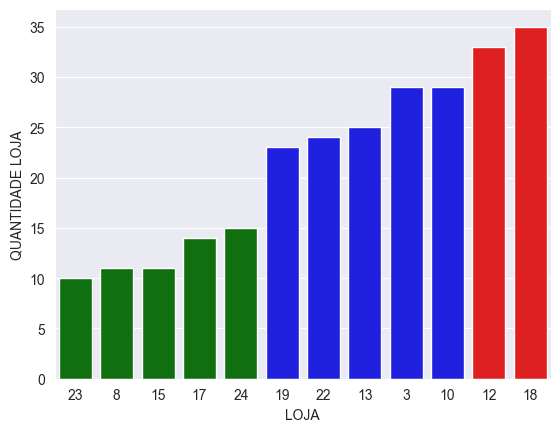

In [34]:
sns.set_style("darkgrid")
ax = sns.barplot(data=gr, x="LOJA", y="QUANTIDADE LOJA",order=gr["LOJA"], palette=colors)   
ax= ax

In [35]:
import plotly.express as px
import pandas as pd
import dash
from dash import dcc, html, dash_table

fig = px.bar(gr, x="LOJA", y="QUANTIDADE LOJA",text='LOJA',title="Gráfico de barras interativo")

fig.update_traces(textposition='outside')  # ou 'auto', 'inside'

fig.show(renderer="browser")  

In [36]:

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(figure=fig),  # Gráfico acima
    html.Hr(),              # Linha separadora
    html.H4("Tabela de Lojas"),  # Título da tabela
    dash_table.DataTable(
        columns=[{"name": i, "id": i} for i in lj.columns],
        data=lj.to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={'textAlign': 'left', 'padding': '5px'}
    )
])

if __name__ == '__main__':
    app.run(debug=True)



In [37]:
lj

,LOJA,SEQPRODUTO,DESCRICAO,QUANTIDADE DISPONIVEL,DIAS DE ESTOQUE,DIAS ULTIMA ENTRADA,MEDIA DE VENDA,DESCRDIVISAO,DECRSECAO,DIAS ULTIMA ENTRADA CD,QUANTIDADE DISPONIVEL CD,STATUS
0,8,52,ACUCAR REFINADO CARAVELAS PC 1KG,1545.0,5.50,5.0,280.667,MERCEARIA,MATINAIS,7 days 08:18:42.478124,54767.0,A
1,10,52,ACUCAR REFINADO CARAVELAS PC 1KG,4305.0,5.88,3.0,732.222,MERCEARIA,MATINAIS,7 days 08:18:42.478124,54767.0,A
2,17,52,ACUCAR REFINADO CARAVELAS PC 1KG,523.0,5.14,4.0,101.778,MERCEARIA,MATINAIS,7 days 08:18:42.478124,54767.0,A
3,17,118,BEB LACTEA UHT TODDYNHO CX 200ML CHOCOLATE,80.0,3.10,45.0,25.778,PERECIVEIS,LEITES,+ 7 dias,22094.0,A
4,19,409,CERV PILSEN ANTARCTICA LT 473ML,-80.0,-2.35,3.0,34.000,MERCEARIA,BEBIDAS ALCOOLICAS,4 days 08:18:42.478124,120.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...
254,13,79674,FAROFA RECEIT CASEIRA GRANFINO 250G COST DEF ...,23.0,4.22,10.0,5.444,MERCEARIA,CEREAIS,4 days 08:18:42.478124,592.0,A
255,18,79674,FAROFA RECEIT CASEIRA GRANFINO 250G COST DEF ...,33.0,3.84,8.0,8.600,MERCEARIA,CEREAIS,4 days 08:18:42.478124,592.0,A
256,22,81878,ESC DENTAL SWISSCARE UN INFANT C/PROT CERDAS,9.0,3.72,19.0,2.422,MERCEARIA,PERFUMARIA,+ 7 dias,1704.0,A
257,15,86195,LIMP UAU PERFUM 500ML CHA BRANCO,14.0,4.20,3.0,3.333,MERCEARIA,LIMPEZA,+ 7 dias,793.0,A
